### Import libraries 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from scipy.stats import boxcox

### Import data

In [12]:
df = pd.read_csv(r"C:\Users\asus\Desktop\AirPassengers.csv")

In [13]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [15]:
df = pd.read_csv(r"C:\Users\asus\Desktop\AirPassengers.csv", parse_dates=True, index_col = 'Month')

In [16]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

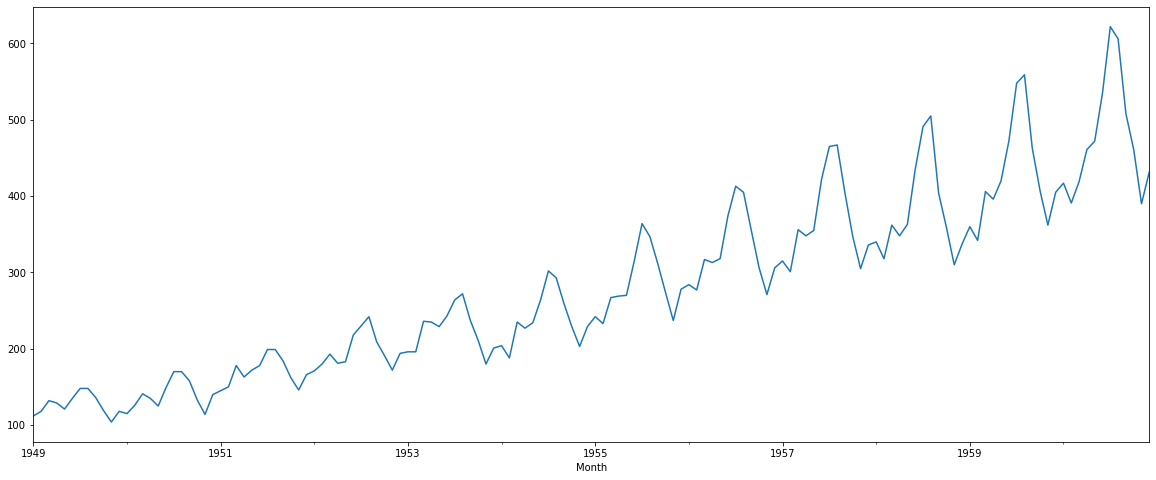

In [8]:
df['#Passengers'].plot(figsize=(20,8))

Several characteristics can be observed:
- this time series has a trend, going upward
- it has some seasonality, repeating pattern in time
- amplitude of this seasonal pattern increases over time, at the beginning the amplitude is pretty small but at the end it gets larger and larger

### Square root transformations

In [17]:
df['SqrtPassengers'] = np.sqrt(df['#Passengers'])

<AxesSubplot:xlabel='Month'>

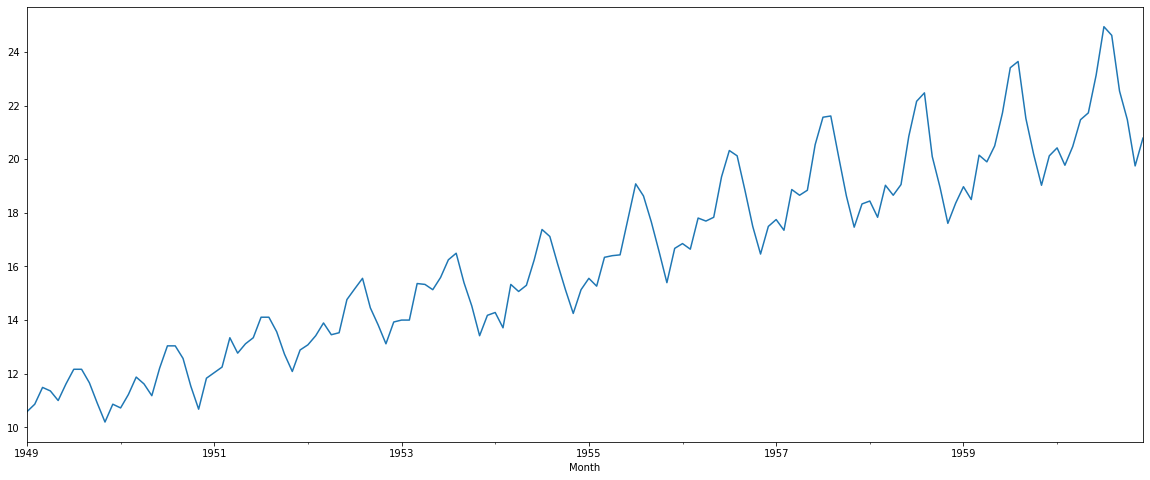

In [18]:
df['SqrtPassengers'].plot(figsize=(20,8))

### Log transformations

In [19]:
df['LogPassengers'] = np.log(df['#Passengers'])

<AxesSubplot:xlabel='Month'>

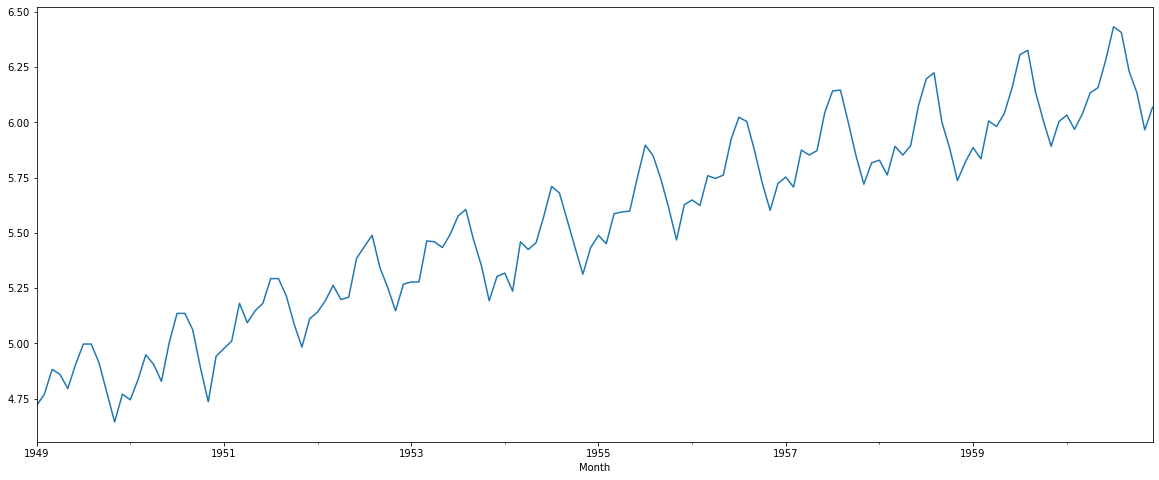

In [20]:
df['LogPassengers'].plot(figsize=(20,8))

### Box Cox Transformations

In [21]:
data, lam = boxcox(df['#Passengers'])

In [22]:
lam

0.14802265137037945

In [23]:
df['BoxCoxPassengers'] = data

<AxesSubplot:xlabel='Month'>

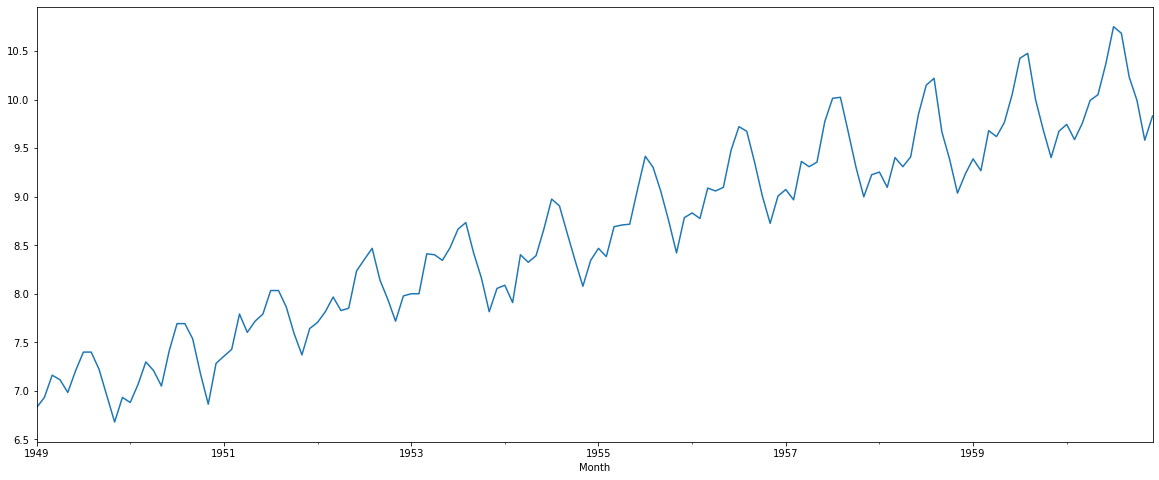

In [24]:
df['BoxCoxPassengers'].plot(figsize=(20,8))

### Histogram for all type of transformations

array([[<AxesSubplot:title={'center':'#Passengers'}>,
        <AxesSubplot:title={'center':'SqrtPassengers'}>],
       [<AxesSubplot:title={'center':'LogPassengers'}>,
        <AxesSubplot:title={'center':'BoxCoxPassengers'}>]], dtype=object)

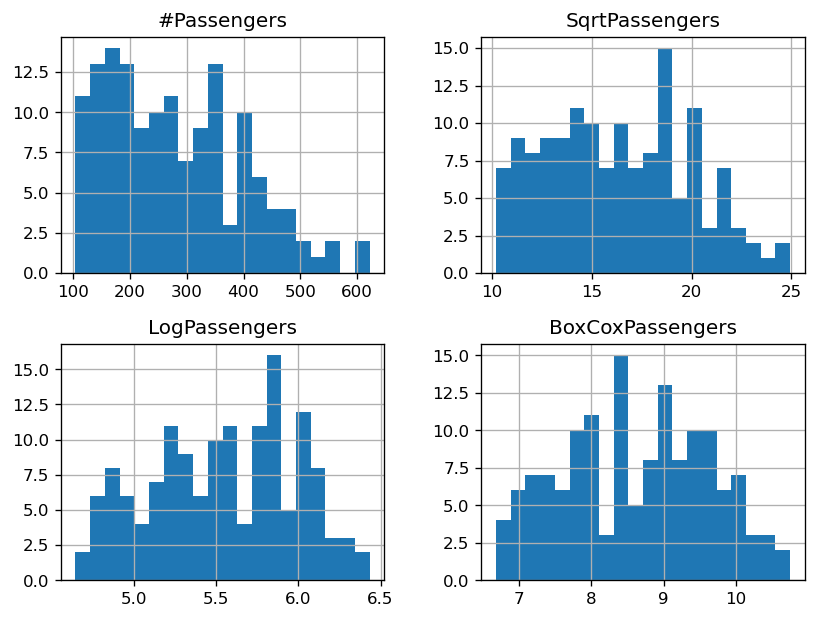

In [28]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':120})
df.hist(bins=20)

Observations:
- Actual data: most of the values concentrated in the lower 100
- Sqrt data: Distribution has been pushed to the right, its more flat than before and less concentrated on the lower values
- Log data: The distibution now kind of resembles a mountain where its more evenly spaced out in the center instead of off to one side
- BoxCox: Almost the same pattern, except largest peak is now closer to the center

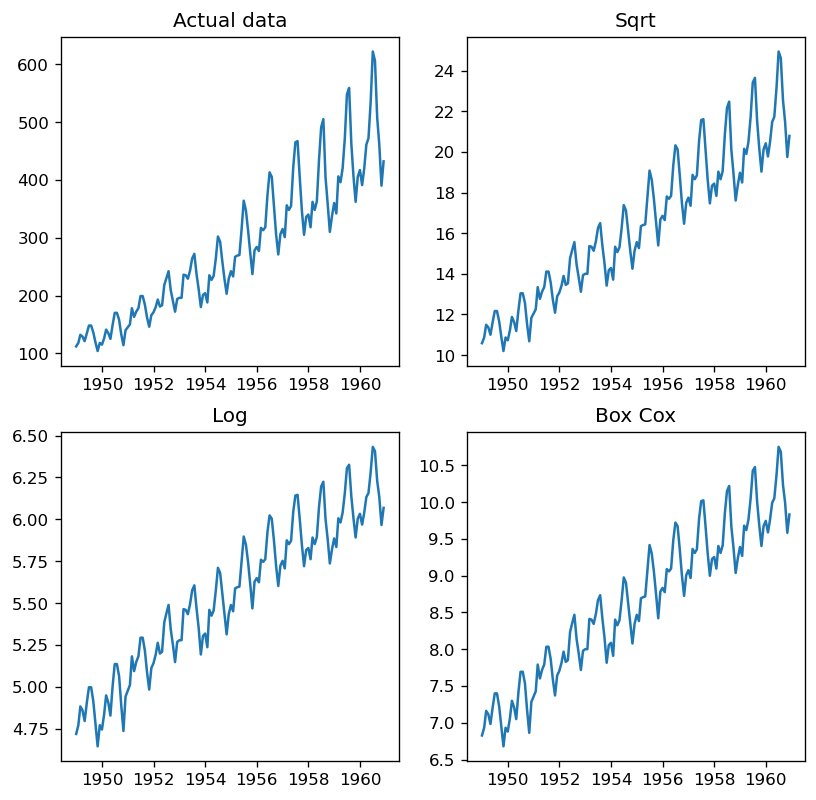

In [39]:
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':120})

plt.subplot(2,2,1)
plt.plot(df['#Passengers'])
plt.title('Actual data')

plt.subplot(2,2,2)
plt.plot(df['SqrtPassengers'])
plt.title('Sqrt')

plt.subplot(2,2,3)
plt.plot(df['LogPassengers'])
plt.title('Log')

plt.subplot(2,2,4)
plt.plot(df['BoxCoxPassengers'])
plt.title('Box Cox')

plt.show()